#ANGGOTA KELOMPOK
Tugas Fuzzy Membuat 5 percobaan kasus untuk 3 Metode Fuzzy
Tsukamoto, Mamadani, Sugeno
1.   ALDIANTO DICKYU SEPTIAN (5210411260)
2.   YUSUF ASHARI            (5210411262)
3.   GILANG WIWAHA SOEKARNO  (5210411293)



##Analisa Kasus
Sebuah pabrik mesin cuci akan membuat sebuah mesin cuci otomatis berbasis fuzzy yang dapat mengatur kecepatan putar mesin berdasarkan banyaknya pakaian dan tingkat kekotoran. Mesin cuci telah dilengkapi dengan sensor yang dapat mendeteksi banyaknya pakaian dan tingkat kekotoran pakaian. Spesifikasinya sebagai berikut:

Kecepatan putar mesin dalam pencucian minimal 600 rpm (lambat) dan maksimal 1300 rpm (cepat).
Banyaknya pakaian dinyatakan dengan nilai 0-100 yang mana nilai <= 50 termasuk sedikit dan >= 90 termasuk banyak.

Tingkat kekotoran dinyatakan dengan nilai 0-100 yang mana nilai 0-50 adalah rendah, 60 adalah sedang, dan 90-100 adalah tinggi.

Berdasarkan berbagai pengujian terhadap prototype mesin, diperoleh aturan sebagai berikut:

[R1] Jika pakaian sedikit dan kekotoran rendah, maka putaran lambat.

[R2] Jika pakaian sedikit dan kekotoran sedang, maka putaran lambat.

[R3] Jika pakaian sedikit dan kekotoran tinggi, maka putaran cepat.

[R4] Jika pakaian banyak dan kekotoran rendah, maka putaran lambat.

[R5] Jika pakaian banyak dan kekotoran sedang, maka putaran cepat.

[R6] Jika pakaian banyak dan kekotoran tinggi, maka putaran cepat.

##MEMBERSHIP
Pembuatan membership dan juga seagai acuan ploting dan Fuzzifikasi

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Fungsi keanggotaan untuk banyaknya pakaian
def pakaian_sedikit(x):
    return np.where(x <= 50, 1, np.where((x > 50) & (x < 90), (90 - x) / 40, 0))

def pakaian_banyak(x):
    return np.where(x <= 50, 0, np.where((x >= 90), 1, (x - 50) / 40))

# Fungsi keanggotaan untuk tingkat kekotoran
def kekotoran_rendah(x):
    return np.where(x <= 50, 1, np.where((x > 50) & (x < 60), (60 - x) / 10, 0))

def kekotoran_sedang(x):
    return np.where((x <= 50) | (x >= 70), 0, np.where((x >= 50) & (x <= 60), (x - 50) / 10, np.where((x >= 60) & (x <= 70), (70 - x) / 10, 0)))

def kekotoran_tinggi(x):
    return np.where(x <= 60, 0, np.where((x > 60) & (x < 70), (x - 60) / 10, 1))

# Fungsi keanggotaan untuk kecepatan putar
def putaran_lambat(x):
    return np.where(x <= 600, 1, np.where(x < 1300, (1300 - x) / 700, 0))

def putaran_cepat(x):
    return np.where(x <= 600, 0, np.where(x < 1300, (x - 600) / 700, 1))


##ARRAY
Berisi Inputan data yang akan dicoba

In [48]:
# Nilai input
pakaian_inputs = [55, 62, 59, 52, 60]
kekotoran_inputs = [67, 60, 70, 69, 65]

tsukamoto_results = []
mamdani_results = []
tsugeno_results = []

##PLOTING
Pembuatan Ploting dari Membership

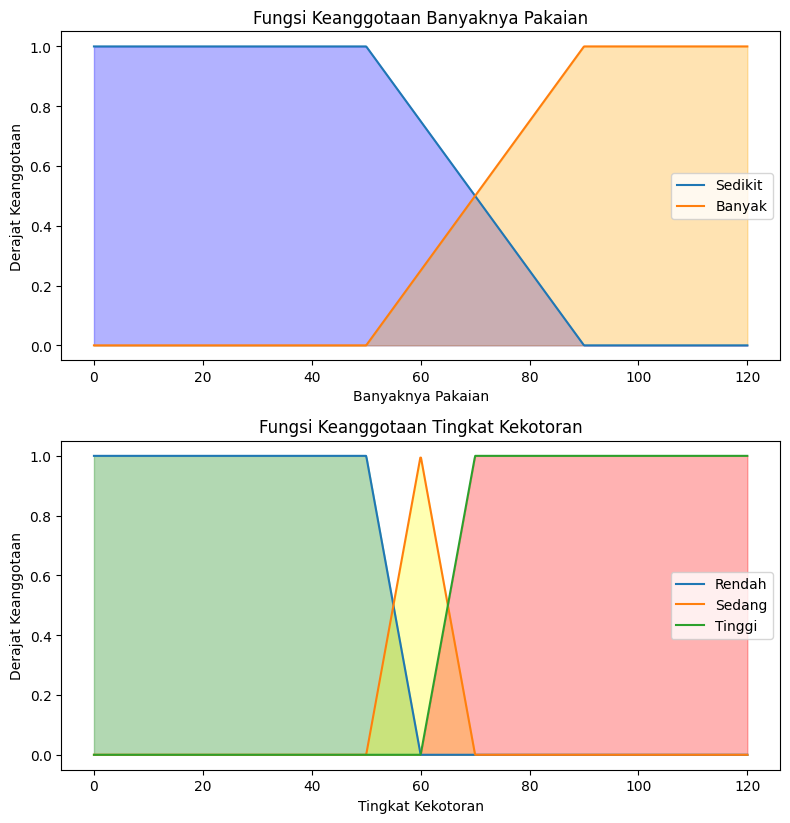

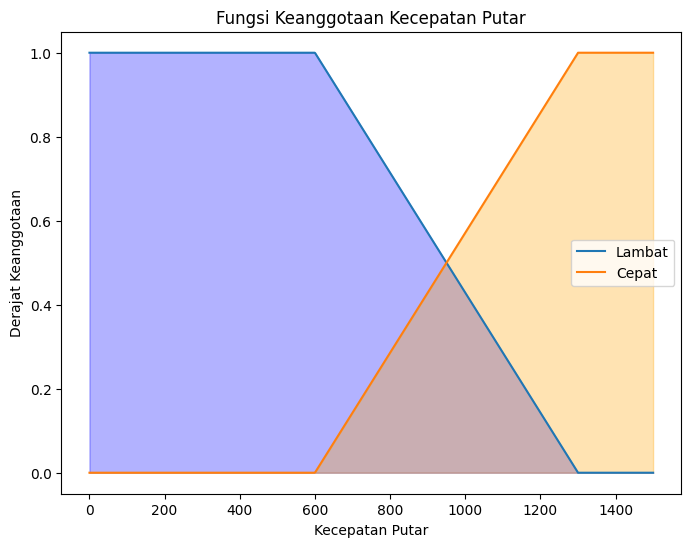

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Data untuk plot
x = np.linspace(0, 120, 1000)
x1 = np.linspace(0, 1500, 1000)
y_pakaian_sedikit = pakaian_sedikit(x)
y_pakaian_banyak = pakaian_banyak(x)
y_kekotoran_rendah = kekotoran_rendah(x)
y_kekotoran_sedang = kekotoran_sedang(x)
y_kekotoran_tinggi = kekotoran_tinggi(x)
y_putaran_lambat = putaran_lambat(x1)
y_putaran_cepat = putaran_cepat(x1)

# Plot untuk banyaknya pakaian
plt.figure(figsize=(8, 12))

plt.subplot(3, 1, 1)
plt.plot(x, y_pakaian_sedikit, label='Sedikit')
plt.fill_between(x, y_pakaian_sedikit, color='blue', alpha=0.3)
plt.plot(x, y_pakaian_banyak, label='Banyak')
plt.fill_between(x, y_pakaian_banyak, color='orange', alpha=0.3)
plt.title('Fungsi Keanggotaan Banyaknya Pakaian')
plt.xlabel('Banyaknya Pakaian')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

# Plot untuk tingkat kekotoran
plt.subplot(3, 1, 2)
plt.plot(x, y_kekotoran_rendah, label='Rendah')
plt.fill_between(x, y_kekotoran_rendah, color='green', alpha=0.3)
plt.plot(x, y_kekotoran_sedang, label='Sedang')
plt.fill_between(x, y_kekotoran_sedang, color='yellow', alpha=0.3)
plt.plot(x, y_kekotoran_tinggi, label='Tinggi')
plt.fill_between(x, y_kekotoran_tinggi, color='red', alpha=0.3)
plt.title('Fungsi Keanggotaan Tingkat Kekotoran')
plt.xlabel('Tingkat Kekotoran')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.tight_layout()
plt.show()

# Plot untuk kecepatan putar
plt.figure(figsize=(8, 6))

plt.plot(x1, y_putaran_lambat, label='Lambat')
plt.fill_between(x1, y_putaran_lambat, color='blue', alpha=0.3)
plt.plot(x1, y_putaran_cepat, label='Cepat')
plt.fill_between(x1, y_putaran_cepat, color='orange', alpha=0.3)
plt.title('Fungsi Keanggotaan Kecepatan Putar')
plt.xlabel('Kecepatan Putar')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.show()


##Rule dan Rumus
1. Perulangan Untuk 3 Metode Fuzzy
2. Rumus menggunakan dari perhitungan manual dan hasil dari perhitungan manual dan code sama
3. Menampilkan output inferensi dan derajat untuk memastikan setiap rule di kelola dengan benar dan menghasilkan output yang sebenarnya

In [50]:
# Perulangan untuk 3 Metode Tsukamoto, Mamdani, Tsugeno
for pakaian_input, kekotoran_input in zip(pakaian_inputs, kekotoran_inputs):
    print(f"//////////////Pakaian input: {pakaian_input}, Kekotoran input: {kekotoran_input}\\\\\\\\\\\\\\\\")
    # Inferensi dan deffuzifikasi untuk Tsukamoto
    rule_strength = {
        'R1': np.minimum(pakaian_sedikit(pakaian_input), kekotoran_rendah(kekotoran_input)),
        'R2': np.minimum(pakaian_sedikit(pakaian_input), kekotoran_sedang(kekotoran_input)),
        'R3': np.minimum(pakaian_sedikit(pakaian_input), kekotoran_tinggi(kekotoran_input)),
        'R4': np.minimum(pakaian_banyak(pakaian_input), kekotoran_rendah(kekotoran_input)),
        'R5': np.minimum(pakaian_banyak(pakaian_input), kekotoran_sedang(kekotoran_input)),
        'R6': np.minimum(pakaian_banyak(pakaian_input), kekotoran_tinggi(kekotoran_input))
    }
    u_sedikit = pakaian_sedikit(pakaian_input)
    u_banyak = pakaian_banyak(pakaian_input)
    u_rendah = kekotoran_rendah(kekotoran_input)
    u_sedang = kekotoran_sedang(kekotoran_input)
    u_tinggi = kekotoran_tinggi(kekotoran_input)
    w1 = min(u_sedikit, u_rendah)
    w2 = min(u_sedikit, u_sedang)
    w3 = min(u_sedikit, u_tinggi)
    w4 = min(u_banyak, u_rendah)
    w5 = min(u_banyak, u_sedang)
    w6 = min(u_banyak, u_tinggi)
    z1 = 600
    z2 = 10*kekotoran_input+200
    z3 = 10*kekotoran_input+300
    z4 = 5*pakaian_input+2*kekotoran_input
    z5 = 5*pakaian_input+4*kekotoran_input+200
    z6 = 5*pakaian_input+5*kekotoran_input+400
    z_tsugeno = ((w1*z1) + (w2*z2) + (w3*z3) + (w4*z4) + (w5*z5) + (w6*z6)) / (w1 + w2 + w3 + w4 + w5 + w6)
    tsugeno_results.append(z_tsugeno)
    print("TSUGENO")
    print('Min W1 :',w1," Nilai Z1 :",z1)
    print('Min W2 :',w2," Nilai Z2 :",z2)
    print('Min W3 :',w3," Nilai Z3 :",z3)
    print('Min W4 :',w4," Nilai Z4 :",z4)
    print('Min W5 :',w5," Nilai Z5 :",z5)
    print('Min W6 :',w6," Nilai Z6 :",z6)
    print('Nilai Deffuzifikasi Tsugeno :{:.2f}'.format(z_tsugeno),'\n')

    # Inferensi dan deffuzifikasi untuk Mamdani
    w1 = min(u_sedikit, u_rendah)
    w2 = min(u_sedikit, u_sedang)
    w3 = min(u_sedikit, u_tinggi)
    w4 = min(u_banyak, u_rendah)
    w5 = min(u_banyak, u_sedang)
    w6 = min(u_banyak, u_tinggi)
    i1 = max(w1, w2, w4)
    i2 = max(w3, w5, w6)
    t1 = 0
    t4 = 1300
    t2 = (i1 * 700) + 600
    t3 = (i2 * 700) + 600
    fungsi = w1 * sp.Symbol('z')
    m1 = sp.integrate(fungsi, ('z', t1, t2))
    fungsi = (sp.Symbol('z') - 600) / (1300 - 600) * sp.Symbol('z')
    m2 = sp.integrate(fungsi, ('z', t2, t3))
    fungsi = w3 * sp.Symbol('z')
    m3 = sp.integrate(fungsi, ('z', t3, t4))
    A1 = (t2 * w1) - (t1 * w1)
    fungsi = (sp.Symbol('z') - 600) / 700
    A2 = sp.integrate(fungsi, ('z', t2, t3))
    A3 = (t4 * w3) - (t3 * w3)
    Mtotal = (m1 + m2 + m3)
    Atotal = (A1 + A2 + A3)
    z_mamdani = Mtotal / Atotal
    mamdani_results.append(z_mamdani)
    print("MAMDANI")
    print('W1 :', w1)
    print('W2 :', w2)
    print('W3 :', w3)
    print('W4 :', w4)
    print('W5 :', w5)
    print('W6 :', w6)
    print("Hasil integral M1: {:.2f}".format(m1))
    print("Hasil integral M2: {:.2f}".format(m2))
    print("Hasil integral M3: {:.2f}".format(m3))
    print("A1:", round(A1))
    print("A2:", round(A2))
    print("A3:", round(A3))
    print('Hasil Deffuzifikasi Mamdani adalah', z_mamdani, "RPM\n")

    # Inferensi dan deffuzifikasi untuk Tsukamoto
    rule_strength = {
        'R1': np.minimum(pakaian_sedikit(pakaian_input), kekotoran_rendah(kekotoran_input)),
        'R2': np.minimum(pakaian_sedikit(pakaian_input), kekotoran_sedang(kekotoran_input)),
        'R3': np.minimum(pakaian_sedikit(pakaian_input), kekotoran_tinggi(kekotoran_input)),
        'R4': np.minimum(pakaian_banyak(pakaian_input), kekotoran_rendah(kekotoran_input)),
        'R5': np.minimum(pakaian_banyak(pakaian_input), kekotoran_sedang(kekotoran_input)),
        'R6': np.minimum(pakaian_banyak(pakaian_input), kekotoran_tinggi(kekotoran_input))
    }
    u_sedikit = pakaian_sedikit(pakaian_input)
    u_banyak = pakaian_banyak(pakaian_input)
    u_rendah = kekotoran_rendah(kekotoran_input)
    u_sedang = kekotoran_sedang(kekotoran_input)
    u_tinggi = kekotoran_tinggi(kekotoran_input)
    w1 = min(u_sedikit, u_rendah)
    w2 = min(u_sedikit, u_sedang)
    w3 = min(u_sedikit, u_tinggi)
    w4 = min(u_banyak, u_rendah)
    w5 = min(u_banyak, u_sedang)
    w6 = min(u_banyak, u_tinggi)
    z1 = (1300 - (w1*700))
    z2 = (1300 - (w2*700))
    z3 = (600 + (w3*700))
    z4 = (1300 - (w4*700))
    z5 = (600 + (w5*700))
    z6 = (600 + (w6*700))
    z_tsukamoto = ((w1*z1) + (w2*z2) + (w3*z3) + (w4*z4) + (w5*z5) + (w6*z6)) / (w1 + w2 + w3 + w4 + w5 + w6)
    print("TSUKAMOTO")
    print('W1 :',w1,"Hasil",(z1))
    print('W2 :',w2,"Hasil",(z2))
    print('W3 :',w3,"Hasil",(z3))
    print('W4 :',w4,"Hasil",(z4))
    print('W5 :',w5,"Hasil",(z5))
    print('W6 :',w6,"Hasil",(z6))
    # Cetak hasil deffuzifikasi
    print("Hasil Deffuzifikasi TSUKAMOTO adalah", z_tsukamoto, "RPM\n")
    tsukamoto_results.append(z_tsukamoto)


//////////////Pakaian input: 55, Kekotoran input: 67\\\\\\\\
TSUGENO
Min W1 : 0.0  Nilai Z1 : 600
Min W2 : 0.3  Nilai Z2 : 870
Min W3 : 0.7  Nilai Z3 : 970
Min W4 : 0.0  Nilai Z4 : 409
Min W5 : 0.125  Nilai Z5 : 743
Min W6 : 0.125  Nilai Z6 : 1010
Nilai Deffuzifikasi Tsugeno :927.30 

MAMDANI
W1 : 0.0
W2 : 0.3
W3 : 0.7
W4 : 0.0
W5 : 0.125
W6 : 0.125
Hasil integral M1: 0.00
Hasil integral M2: 135613.33
Hasil integral M3: 175665.00
A1: 0
A2: 140
A3: 147
Hasil Deffuzifikasi Mamdani adalah 1084.59349593496 RPM

TSUKAMOTO
W1 : 0.0 Hasil 1300.0
W2 : 0.3 Hasil 1090.0
W3 : 0.7 Hasil 1090.0
W4 : 0.0 Hasil 1300.0
W5 : 0.125 Hasil 687.5
W6 : 0.125 Hasil 687.5
Hasil Deffuzifikasi TSUKAMOTO adalah 1009.5 RPM

//////////////Pakaian input: 62, Kekotoran input: 60\\\\\\\\
TSUGENO
Min W1 : 0.0  Nilai Z1 : 600
Min W2 : 0.7  Nilai Z2 : 800
Min W3 : 0.0  Nilai Z3 : 900
Min W4 : 0.0  Nilai Z4 : 430
Min W5 : 0.3  Nilai Z5 : 750
Min W6 : 0.0  Nilai Z6 : 1010
Nilai Deffuzifikasi Tsugeno :785.00 

MAMDANI
W1 :

##Menampilkan Hasil dan Perbandingan Hasil dari Setiap Metode


In [57]:
# Menampilkan hasil
for i in range(len(pakaian_inputs)):
    print(f"Percobaan kasus {i+1}:")
    print(f"Pakaian input: {pakaian_inputs[i]}, Kekotoran input: {kekotoran_inputs[i]}")
    print("Hasil Tsukamoto:", round(tsukamoto_results[i], 2), "RPM")
    print("Hasil Mamdani:", round(mamdani_results[i], 2), "RPM")
    print("Hasil Tsugeno:", round(tsugeno_results[i], 2), "RPM\n")


Percobaan kasus 1:
Pakaian input: 55, Kekotoran input: 67
Hasil Tsukamoto: 1009.5 RPM
Hasil Mamdani: 1084.59 RPM
Hasil Tsugeno: 927.3 RPM

Percobaan kasus 2:
Pakaian input: 62, Kekotoran input: 60
Hasil Tsukamoto: 810.0 RPM
Hasil Mamdani: 968.67 RPM
Hasil Tsugeno: 785.0 RPM

Percobaan kasus 3:
Pakaian input: 59, Kekotoran input: 70
Hasil Tsukamoto: 1055.88 RPM
Hasil Mamdani: 1057.02 RPM
Hasil Tsugeno: 1010.12 RPM

Percobaan kasus 4:
Pakaian input: 52, Kekotoran input: 69
Hasil Tsukamoto: 1175.91 RPM
Hasil Mamdani: 1068.81 RPM
Hasil Tsugeno: 970.05 RPM

Percobaan kasus 5:
Pakaian input: 60, Kekotoran input: 65
Hasil Tsukamoto: 891.67 RPM
Hasil Mamdani: 1125.00000000000 RPM
Hasil Tsugeno: 897.5 RPM



##Ploting Perbandingan Kecepatan Putaran Untuk Setiap Percobaan
Ploting yang akan menunjukan perbedaan dari setiap uji coba untuk ke 3 metode

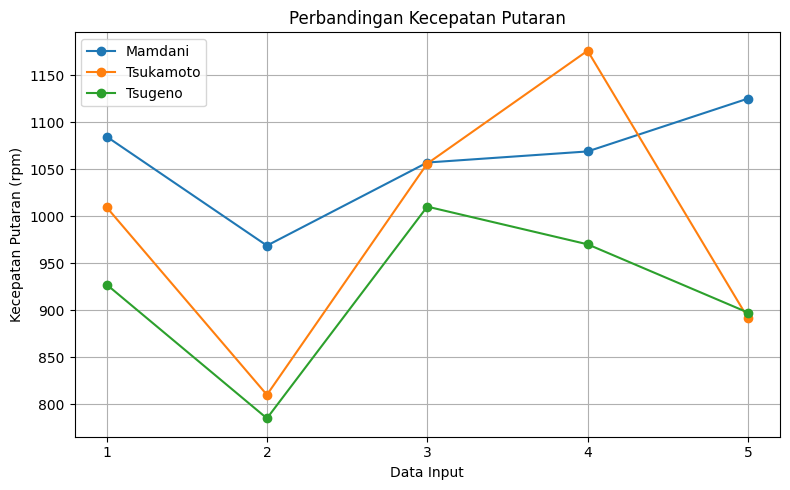

In [52]:
# Plot hasil kecepatan putaran
plt.figure(figsize=(8, 5))

plt.plot(range(len(pakaian_inputs)), mamdani_results, marker='o', label='Mamdani')
plt.plot(range(len(pakaian_inputs)), tsukamoto_results, marker='o', label='Tsukamoto')
plt.plot(range(len(pakaian_inputs)), tsugeno_results, marker='o', label='Tsugeno')

plt.xticks(range(len(pakaian_inputs)), ['1', '2', '3', '4', '5'])
plt.xlabel('Data Input')
plt.ylabel('Kecepatan Putaran (rpm)')
plt.title('Perbandingan Kecepatan Putaran')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##Export Hasil
export hasil menjadi excel dan juga export untuk plotingnya dan dibuat ke dalam zip

In [53]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

# Membuat DataFrame dari hasil perhitungan
data = {
    'Pakaian Input': pakaian_inputs,
    'Kekotoran Input': kekotoran_inputs,
    'Hasil Tsukamoto': tsukamoto_results,
    'Hasil Mamdani': mamdani_results,
    'Hasil Tsugeno': tsugeno_results
}

# Periksa panjang masing-masing array dalam data
for key, value in data.items():
    print(f'{key}: {len(value)}')

# Pastikan panjang semua array sama
array_lengths = set(len(value) for value in data.values())
if len(array_lengths) != 1:
    raise ValueError("Panjang semua array dalam data harus sama")

# Membuat DataFrame
df = pd.DataFrame(data)

# Menyimpan DataFrame ke file Excel
excel_file = 'hasil_perhitungan_fuzzy.xlsx'
df.to_excel(excel_file, index=False)

# Plot untuk banyaknya pakaian
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(x, y_pakaian_sedikit, label='Sedikit')
plt.plot(x, y_pakaian_banyak, label='Banyak')
plt.title('Fungsi Keanggotaan Banyaknya Pakaian')
plt.xlabel('Banyaknya Pakaian')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.tight_layout()  # Sela

# Plot untuk tingkat kekotoran
plt.subplot(3, 1, 2)
plt.plot(x, y_kekotoran_rendah, label='Rendah')
plt.plot(x, y_kekotoran_sedang, label='Sedang')
plt.plot(x, y_kekotoran_tinggi, label='Tinggi')
plt.title('Fungsi Keanggotaan Tingkat Kekotoran')
plt.xlabel('Tingkat Kekotoran')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.tight_layout()  # Sela

# Plot untuk kecepatan putar
plt.subplot(3, 1, 3)
plt.plot(x1, y_putaran_lambat, label='Lambat')
plt.plot(x1, y_putaran_cepat, label='Cepat')
plt.title('Fungsi Keanggotaan Kecepatan Putar')
plt.xlabel('Kecepatan Putar')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.tight_layout()  # Sela

# Menyimpan plotting ke dalam file
plot_file = 'membership.png'
plt.savefig(plot_file)
plt.close()

# Plot hasil kecepatan putaran
plt.figure(figsize=(8, 5))

plt.plot(range(len(pakaian_inputs)), mamdani_results, marker='o', label='Mamdani')
plt.plot(range(len(pakaian_inputs)), tsukamoto_results, marker='o', label='Tsukamoto')
plt.plot(range(len(pakaian_inputs)), tsugeno_results, marker='o', label='Tsugeno')

plt.xticks(range(len(pakaian_inputs)), ['1', '2', '3', '4', '5'])
plt.xlabel('Data Input')
plt.ylabel('Kecepatan Putaran (rpm)')
plt.title('Perbandingan Kecepatan Putaran')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Sela

# Menyimpan plotting ke dalam file
comparison_plot_file = 'perbandingan.png'
plt.savefig(comparison_plot_file)
plt.close()

# Membuat file ZIP dan menambahkan file Excel dan plotting ke dalamnya
zip_file = 'hasil_perhitungan_data.zip'
with zipfile.ZipFile(zip_file, 'w') as zipf:
    zipf.write(excel_file)
    zipf.write(plot_file)
    zipf.write(comparison_plot_file)

print(f'File ZIP "{zip_file}" berhasil dibuat.')


Pakaian Input: 5
Kekotoran Input: 5
Hasil Tsukamoto: 5
Hasil Mamdani: 5
Hasil Tsugeno: 5
File ZIP "hasil_perhitungan_data.zip" berhasil dibuat.


##Analisis Code:

1. Pada kode ini, terdapat tiga metode fuzzy yang diimplementasikan, yaitu Tsukamoto, Mamdani, dan Sugeno.
2. Input yang digunakan adalah banyaknya pakaian dan tingkat kekotoran, sedangkan output yang dihasilkan adalah kecepatan putaran mesin cuci.
3. Fungsi keanggotaan untuk input dan output didefinisikan dengan menggunakan fungsi Python.
4. Terdapat perulangan untuk menguji kelima kasus input yang telah ditetapkan sebelumnya.
5. Pada setiap kasus input, dilakukan inferensi dan defuzzifikasi menggunakan ketiga metode fuzzy tersebut.
6. Hasil defuzzifikasi dari ketiga metode ditampilkan untuk setiap kasus input.
7. Selanjutnya, hasil perhitungan disimpan dalam format Excel dan plotting fungsi keanggotaan serta perbandingan kecepatan putaran disimpan dalam format gambar.
8. Semua file hasil disimpan dalam sebuah file ZIP.

##Kesimpulan
Kesimpulan:

1. Kode ini memberikan implementasi lengkap dari tiga metode fuzzy (Tsukamoto, Mamdani, dan Sugeno) untuk sistem pengendalian kecepatan putaran mesin cuci berdasarkan banyaknya pakaian dan tingkat kekotoran.
2. Dengan menggunakan kode ini, pengguna dapat menguji berbagai kasus input dan melihat hasil defuzzifikasi dari ketiga metode fuzzy.
3. Hasil perhitungan dan plotting disajikan dalam format yang mudah dibaca dan dianalisis.
4. Kode ini dapat menjadi referensi yang bermanfaat bagi siapa saja yang ingin mempelajari atau mengimplementasikan sistem fuzzy untuk kasus serupa.
5. Perbandingan hasil dari ketiga metode fuzzy dapat memberikan wawasan tentang kelebihan dan kekurangan masing-masing metode dalam menangani kasus tertentu.
6. Secara keseluruhan, kode ini menyediakan solusi lengkap untuk pengendalian kecepatan putaran mesin cuci menggunakan logika fuzzy, serta memungkinkan pengguna untuk melakukan analisis dan perbandingan hasil dari metode-metode yang digunakan.

